In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Уровень 1

Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.



Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [48]:
df = pd.read_csv(r"C:\Users\roman\ds_course\data\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
# процент детей (младше 18 лет)

round(len(df[df['Age'] < 18]) /
      len(df[df['Age'] >= 18]) * 100, 2)

18.8

In [51]:
# соотношение мужчин/женщин на борту (включены все возраста)

round((df[df['Sex'] == 'male']).shape[0] /
      (df[df['Sex'] == 'female']).shape[0], 2)

1.84

In [52]:
# соотношение мужчин/женщин на борту (только 18 и более лет)

round((df[(df['Sex'] == 'male') & (df['Age'] >= 18)]).shape[0] /
      (df[(df['Sex'] == 'female') & (df['Age'] >= 18)]).shape[0], 2)

1.92

## Уровень 2

Посчитать, по скольким людям нет информации (пола или возраста)



Вывести гистограмму по возрасту пассажиров



Посчитать, какой процент мужчин и женщин выжили, какой процент детей выжили.



Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# Посчитать, по скольким людям нет информации (пола или возраста)
(df['Sex'].isna() | df['Age'].isna()).sum()

177

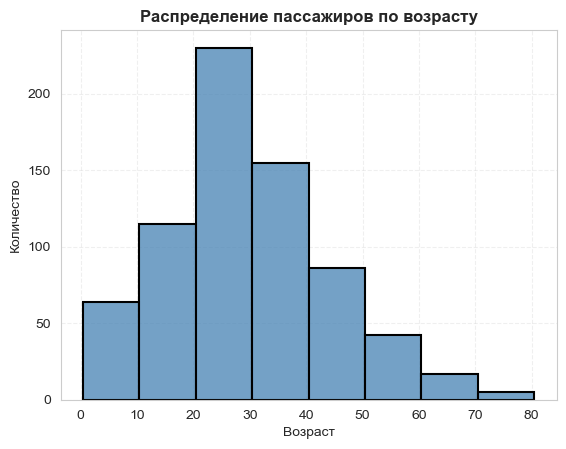

In [60]:
# Вывести гистограмму по возрасту пассажиров

sns.histplot(data=df, x='Age', color='steelblue', edgecolor='black', linewidth=1.5, binwidth=10)

plt.title('Распределение пассажиров по возрасту', fontsize=12, fontweight='bold')

plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.grid(True, alpha=0.3, linestyle='--')

plt.show()

In [80]:
# Посчитать, какой процент мужчин

round(
    df[(df['Age'] >= 18) & (df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0] \
    / df[(df['Age'] >= 18) & (df['Sex'] == 'male')].shape[0] \
    * 100,
    2
)

17.72

In [81]:
# Посчитать, какой процент женщин выжили

round(
    df[(df['Age'] >= 18) & (df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0] \
    / df[(df['Age'] >= 18) & (df['Sex'] == 'female')].shape[0] \
    * 100,
    2
)

77.18

In [83]:
# Посчитать, какой процент детей выжили.

round(
    df[(df['Age'] < 18) & (df['Survived'] == 1)].shape[0] \
    / df[(df['Age'] < 18)].shape[0] \
    * 100,
    2
)

53.98

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [89]:
df['AgeGroup'] = pd.qcut(df['Age'], q=6, duplicates='drop')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.419, 18.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(23.0, 28.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.419, 18.0]"


In [96]:
c1 = pd.pivot_table(
    data=df,
    index='Survived',
    columns='AgeGroup',
    values='PassengerId',
    aggfunc='count'
)
c1

AgeGroup,"(0.419, 18.0]","(18.0, 23.0]","(23.0, 28.0]","(28.0, 34.0]","(34.0, 44.0]","(44.0, 80.0]"
Survived,,,,,,
0,69,74,71,68,70,72
1,70,33,45,48,51,43


In [100]:
survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()
survival_by_agegroup

AgeGroup
(0.419, 18.0]    0.503597
(18.0, 23.0]     0.308411
(23.0, 28.0]     0.387931
(28.0, 34.0]     0.413793
(34.0, 44.0]     0.421488
(44.0, 80.0]     0.373913
Name: Survived, dtype: float64

Значимой корреляции между возрастом и выживаемостью не было обнаружено

In [101]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [108]:
df[df['Age'] >= 18].groupby('Sex')['Survived'].mean()

Sex
female    0.771845
male      0.177215
Name: Survived, dtype: float64

## Уровень 3

Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv



Загрузить решение на kaggle.



Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]"


Исходя из анализа, можно выдвинуть гипотезу, что с шансом в 77% выживали женщины 18 лет и старше, но также стоит учитывать, что с 75% шансом выживали все люди женского пола, то есть эту гипотезу нужно отразить на всех женщин, девушек и девочек.

In [112]:
solve = pd.DataFrame()
solve.head()

""


In [113]:
solve['PassengerId'] = df['PassengerId']
solve['Survived'] = df['Survived']
solve['Guess_Survived'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
solve

,PassengerId,Survived,Guess_Survived
0,1,0,0
1,2,1,1
2,3,1,1
3,4,1,1
4,5,0,0
...,...,...,...
886,887,0,0
887,888,1,1
888,889,0,1
889,890,1,0


In [117]:
def evaluate_predictions(df, true_col='Survived', pred_col='Guess_Survived'):
    
    matches = df[true_col] == df[pred_col]
    success = matches.sum()
    fail = (~matches).sum()
    total = len(df)
    percentage = success / total * 100

    print(f'success is {success},\n'
          f'fail is {fail},\n'
          f'percentage of success is {percentage:.2f}%')
    
evaluate_predictions(solve)

success is 701,
fail is 190,
percentage of success is 78.68%


In [121]:
test = pd.read_csv(r"C:\Users\roman\ds_course\data\titanic\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
test['Survived'] = test['Sex'].apply(lambda x: 1 if x == 'female' else 0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [123]:
solve = test[['PassengerId', 'Survived']]
solve.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [125]:
solve.to_csv(r'C:\Users\roman\ds_course\data\titanic\solve.csv', index=False)